# Amazon Product Sentiment Analysis

### Project Overview 

In this project, I'm going to analyze the product reviews from your Amazon e-commerce dataset to perform sentiment analysis

#### Note: 

This analysis is specific to Computer & Accessories items only 

### Project Steps 

1. Data Overviewing 
2. Data Preprocessing
3. Sentiment Analysis (using Logistic Regression and Sentiment Intensity Analyzer)
4. Visualization 

### Data Overviewing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_path = os.path.join("amazon.csv")
print(data_path)

amazon.csv


In [3]:
data = pd.read_csv(data_path)

In [4]:
data.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [5]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [6]:
data.isna().mean() * 100

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.000000
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

### Data Preprocessing

In [8]:
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['discount_percentage'] = data['discount_percentage'].str.replace('%', '').astype(float)
data['rating'] = data['rating'].replace('|', np.nan).astype(float)
data['rating_count'] = data['rating_count'].str.replace(',','').astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [9]:
data['rating'] = data['rating'].fillna(data['rating'].mean())
data['rating_count'] = data['rating_count'].fillna(data['rating_count'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [10]:
data['category'] = data['category'].fillna('') 

data['sub_category_1'] = data['category'].apply(lambda x: x.split('|')[0] if len(x.split('|')) > 0 else '')
data['sub_category_2'] = data['category'].apply(lambda x: x.split('|')[1] if len(x.split('|')) > 1 else '')
data['sub_category_3'] = data['category'].apply(lambda x: x.split('|')[2] if len(x.split('|')) > 2 else '')
data['sub_category_4'] = data['category'].apply(lambda x: x.split('|')[3] if len(x.split('|')) > 3 else '')
data['sub_category_5'] = data['category'].apply(lambda x: x.split('|')[4] if len(x.split('|')) > 4 else '')

data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_id,review_title,review_content,img_link,product_link,sub_category_1,sub_category_2,sub_category_3,sub_category_4,sub_category_5
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [12]:
data = data.drop('category', axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1465 non-null   float64
 6   rating_count         1465 non-null   float64
 7   about_product        1465 non-null   object 
 8   user_id              1465 non-null   object 
 9   user_name            1465 non-null   object 
 10  review_id            1465 non-null   object 
 11  review_title         1465 non-null   object 
 12  review_content       1465 non-null   object 
 13  img_link             1465 non-null   object 
 14  product_link         1465 non-null   object 
 15  sub_category_1       1465 non-null   o

In [14]:
data = data[(data['sub_category_1'] == 'Computers&Accessories') & (data['sub_category_2'] == 'Accessories&Peripherals')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 1020
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           381 non-null    object 
 1   product_name         381 non-null    object 
 2   discounted_price     381 non-null    float64
 3   actual_price         381 non-null    float64
 4   discount_percentage  381 non-null    float64
 5   rating               381 non-null    float64
 6   rating_count         381 non-null    float64
 7   about_product        381 non-null    object 
 8   user_id              381 non-null    object 
 9   user_name            381 non-null    object 
 10  review_id            381 non-null    object 
 11  review_title         381 non-null    object 
 12  review_content       381 non-null    object 
 13  img_link             381 non-null    object 
 14  product_link         381 non-null    object 
 15  sub_category_1       381 non-null    ob

In [15]:
data['rating_count'] = data['rating_count'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 1020
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           381 non-null    object 
 1   product_name         381 non-null    object 
 2   discounted_price     381 non-null    float64
 3   actual_price         381 non-null    float64
 4   discount_percentage  381 non-null    float64
 5   rating               381 non-null    float64
 6   rating_count         381 non-null    int32  
 7   about_product        381 non-null    object 
 8   user_id              381 non-null    object 
 9   user_name            381 non-null    object 
 10  review_id            381 non-null    object 
 11  review_title         381 non-null    object 
 12  review_content       381 non-null    object 
 13  img_link             381 non-null    object 
 14  product_link         381 non-null    object 
 15  sub_category_1       381 non-null    ob

### Sentiment Analysis

In [16]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [17]:
columns_to_drop = ['product_id', 'product_name', 'discounted_price', 'actual_price', 'discount_percentage',
                   'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'img_link',
                   'product_link', 'sub_category_1', 'sub_category_2', 'sub_category_3', 'sub_category_4', 'sub_category_5']
data_sentiment = data.drop(columns=columns_to_drop)

In [18]:
data_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 1020
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          381 non-null    float64
 1   review_content  381 non-null    object 
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [19]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords_set = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stopwords_set and token not in punctuation_set]
    processed_text = ''.join(tokens)
    return processed_text

data_sentiment['review_content_processed'] = data_sentiment['review_content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
data_sentiment.head()

,rating,review_content,review_content_processed
0,4.2,Looks durable Charging is fine tooNo complains...,looksdurablechargingfinetoonocomplainscharging...
1,4.0,I ordered this cable to connect my phone to An...,orderedcableconnectphoneandroidautocarcablerea...
2,3.9,"Not quite durable and sturdy,https://m.media-a...",quitedurablesturdyhttps//m.media-amazon.com/im...
3,4.2,"Good product,long wire,Charges good,Nice,I bou...",goodproductlongwirechargesgoodniceboughtcabler...
4,4.2,"Bought this instead of original apple, does th...",boughtinsteadoriginalapplework150rsfastapplech...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

X = data_sentiment['review_content']
y = data_sentiment['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [23]:
threshold = 3.5

y_train_binary = y_train >= threshold
y_test_binary = y_test >= threshold

classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train_binary)

LogisticRegression()

In [24]:
#Accuracy 
y_pred = classifier.predict(X_test_bow)
accuracy = accuracy_score(y_test_binary, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.987012987012987


In [25]:
results = pd.DataFrame({'Actual Sentiment' : y_test_binary, 'Predicted Sentiment': y_pred})
print(results)

     Actual Sentiment  Predicted Sentiment
786              True                 True
592              True                 True
73               True                 True
88               True                 True
92               True                 True
..                ...                  ...
403              True                 True
105              True                 True
754              True                 True
814              True                 True
975              True                 True

[77 rows x 2 columns]


In [26]:
total_samples = len(y_pred)
positive_count = sum(y_pred == 1)
negative_count = sum(y_pred == 0)
positive_proportion = (positive_count / total_samples) * 100 
negative_proportion = (negative_count / total_samples) * 100 

print("Proportion of Positive Sentiment: {:.2f}%". format(positive_proportion))
print("Proportion of Negative Sentiment: {:.2f}%". format(negative_proportion))

Proportion of Positive Sentiment: 98.70%
Proportion of Negative Sentiment: 1.30%


In [27]:
y_actual = results['Actual Sentiment']
actual_total_samples = len(y_actual)
actual_positive_count = sum(y_pred == 1)
actual_negative_count = sum(y_pred == 0)
actual_positive_proportion = (positive_count / actual_total_samples) * 100 
actual_negative_proportion = (negative_count / total_samples) * 100 

print("Proportion of Actual Positive Sentiment: {:.2f}%". format(actual_positive_proportion))
print("Proportion of Actual Negative Sentiment: {:.2f}%". format(actual_negative_proportion))

Proportion of Actual Positive Sentiment: 98.70%
Proportion of Actual Negative Sentiment: 1.30%


In [28]:
#Precision and Recall 
from sklearn.metrics import precision_score, recall_score
prec = precision_score(y_test_binary, y_pred)
recall = recall_score(y_test_binary, y_pred)
print("Precision:", prec, "Recall:", recall)

Precision: 0.9868421052631579 Recall: 1.0


In [29]:
#F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test_binary, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9933774834437086


In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [31]:
sia = SentimentIntensityAnalyzer()
def get_sentiment_scores(text): 
    scores = sia.polarity_scores(text)
    return scores['compound']

data_sentiment['review_content_analyzed'] = data_sentiment['review_content'].apply(get_sentiment_scores)

In [32]:
data_sentiment.head()

,rating,review_content,review_content_processed,review_content_analyzed
0,4.2,Looks durable Charging is fine tooNo complains...,looksdurablechargingfinetoonocomplainscharging...,0.9033
1,4.0,I ordered this cable to connect my phone to An...,orderedcableconnectphoneandroidautocarcablerea...,0.9853
2,3.9,"Not quite durable and sturdy,https://m.media-a...",quitedurablesturdyhttps//m.media-amazon.com/im...,0.6808
3,4.2,"Good product,long wire,Charges good,Nice,I bou...",goodproductlongwirechargesgoodniceboughtcabler...,0.8316
4,4.2,"Bought this instead of original apple, does th...",boughtinsteadoriginalapplework150rsfastapplech...,0.9809


In [33]:
def categorize_sentiment(score, neutral_threshold=0.05): 
    if score > neutral_threshold:
        return 'positive'
    elif score < -neutral_threshold:
        return 'negative'
    else: 
        return 'neutral'

data_sentiment['review_content_categorized'] = data_sentiment['review_content_analyzed'].apply(categorize_sentiment)

In [34]:
data_sentiment.head()

,rating,review_content,review_content_processed,review_content_analyzed,review_content_categorized
0,4.2,Looks durable Charging is fine tooNo complains...,looksdurablechargingfinetoonocomplainscharging...,0.9033,positive
1,4.0,I ordered this cable to connect my phone to An...,orderedcableconnectphoneandroidautocarcablerea...,0.9853,positive
2,3.9,"Not quite durable and sturdy,https://m.media-a...",quitedurablesturdyhttps//m.media-amazon.com/im...,0.6808,positive
3,4.2,"Good product,long wire,Charges good,Nice,I bou...",goodproductlongwirechargesgoodniceboughtcabler...,0.8316,positive
4,4.2,"Bought this instead of original apple, does th...",boughtinsteadoriginalapplework150rsfastapplech...,0.9809,positive


In [35]:
data_sentiment['review_content_categorized'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

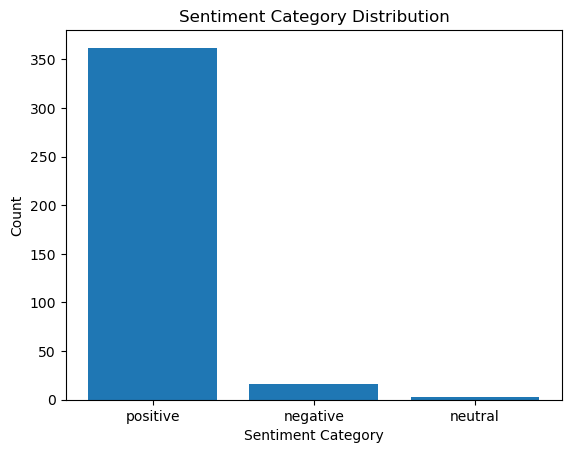

In [36]:
sentiment_counts = data_sentiment['review_content_categorized'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Sentiment Category Distribution')

plt.show()

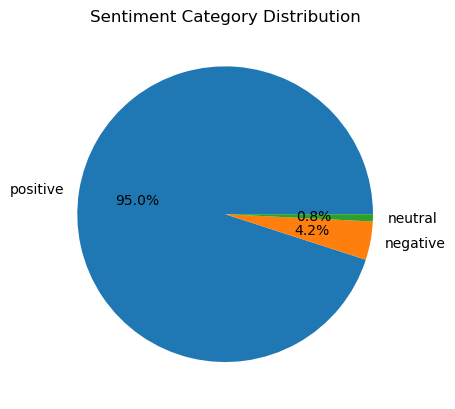

In [37]:
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Category Distribution')
plt.show()

### Summary of Sentiment Analysis

#### Conclusion: 

I employed two distinct methods for sentiment analysis. The overall findings indicate that Amazon has garnered a predominantly positive impression from customers, surpassing the negative sentiment. While there is a minor presence of neutral sentiment, the impact is on lesser significance of overall results. 

###### 1. Logistic Regression Classifier: 
The model demonstrates a high accuracy rate of 98.7% in accurately predicting both positive and negative sentiments. Furthermore, the review analysis for Accessories and Peripherals products within the Computer & Accessories category overall has garnered a 98.7%, both actual and predicted, positive impression from customers. 

###### 2. Sentiment Intensity Analyzer: 

The employed sentiment analysis methodology has categorized the scores of the review_content column into three distinct categories: 'Positive', 'Neutral', and 'Negative'. Following the conducted analysis, it has been observed that positive impressions account for 95% of the chart's composition. These results closely align with the findings of the logistic regression classifier, indicating a consistent outcome.


#### Recommendation 

The company must prioritize the maintenance of its performance and service levels for customers, while continuously striving to enhance them further. This commitment aims to provide customers with the utmost satisfaction and ensure their positive experience and contented departure.

### Product Popularity Analysis 